#Archisha Sinha

##Domain: Computer Vision
##Topic: Harris Corner Detection

## Experiment 4: Determine Corners of the given Image using Harris Corner Detector

###Task 1: Download image and Load it

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
image_path = '/content/Screenshot 2024-08-29 081538.png'
img = cv2.imread(image_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

### Task 2: Apply Harris corner detector on the image

In [ ]:
img_float = np.float32(img_gray)      #Converting gray image to pixel array
harris_corners = cv2.cornerHarris(img_float, 2, 3, 0.04)
harris_corners = cv2.dilate(harris_corners, None)

# print(img_float)

# print(harris_corners)

In [ ]:
# Count the number of corners in the original image
threshold = 0.01 * harris_corners.max()
original_corners = np.sum(harris_corners > threshold)


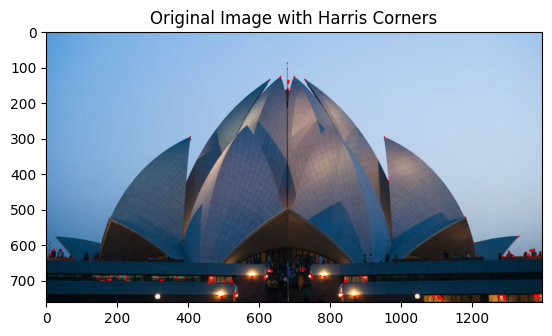

In [ ]:
# Visualize the original image with corners
img_with_corners = img.copy()
img_with_corners[harris_corners > threshold] = [0, 0, 255]
plt.imshow(cv2.cvtColor(img_with_corners, cv2.COLOR_BGR2RGB))
plt.title("Original Image with Harris Corners")
plt.show()

### Task 3: Rotate image and detect corners

In [ ]:
h, w = img.shape[:2]
center = (w / 2, h / 2)
rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_img = cv2.warpAffine(img, rotation_matrix, (w, h))
rotated_gray = cv2.cvtColor(rotated_img, cv2.COLOR_BGR2GRAY)

In [ ]:
rotated_img_float = np.float32(rotated_gray)
rotated_harris = cv2.cornerHarris(rotated_img_float, 2, 3, 0.04)
rotated_harris = cv2.dilate(rotated_harris, None)

In [ ]:
# Count the number of corners in the rotated image
rotated_corners = np.sum(rotated_harris > threshold)

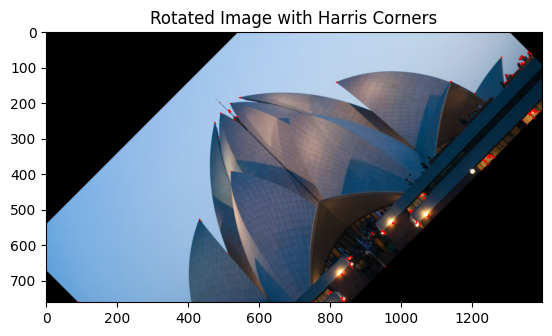

In [ ]:
# Visualize the rotated image with corners
rotated_img_with_corners = rotated_img.copy()
rotated_img_with_corners[rotated_harris > threshold] = [0, 0, 255]
plt.imshow(cv2.cvtColor(rotated_img_with_corners, cv2.COLOR_BGR2RGB))
plt.title("Rotated Image with Harris Corners")
plt.show()

In [ ]:
# Reduce contrast and detect corners
alpha = 0.5  # Contrast control
beta = 0     # Brightness control
contrast_reduced_img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
contrast_reduced_gray = cv2.cvtColor(contrast_reduced_img, cv2.COLOR_BGR2GRAY)

contrast_reduced_img_float = np.float32(contrast_reduced_gray)
contrast_reduced_harris = cv2.cornerHarris(contrast_reduced_img_float, 2, 3, 0.04)
contrast_reduced_harris = cv2.dilate(contrast_reduced_harris, None)

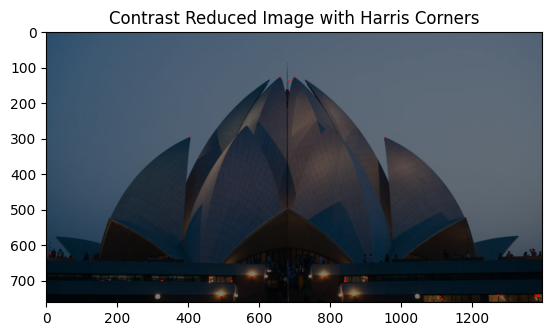

In [ ]:
# Count the number of corners in the contrast-reduced image
contrast_reduced_corners = np.sum(contrast_reduced_harris > threshold)

# Visualize the contrast-reduced image with corners
contrast_reduced_img_with_corners = contrast_reduced_img.copy()
contrast_reduced_img_with_corners[contrast_reduced_harris > threshold] = [0, 0, 255]
plt.imshow(cv2.cvtColor(contrast_reduced_img_with_corners, cv2.COLOR_BGR2RGB))
plt.title("Contrast Reduced Image with Harris Corners")
plt.show()

### Task 4: Compare the number of corners in each case

In [ ]:
print(f"Original Image Corners: {original_corners}")
print(f"Rotated Image Corners: {rotated_corners}")
print(f"Contrast Reduced Image Corners: {contrast_reduced_corners}")

Original Image Corners: 3458
Rotated Image Corners: 2294
Contrast Reduced Image Corners: 502


# Conclusion:

- Harris Corner Detector is used to detect the corner of the image .
- If threshold of corner response is 1% of the maximum value then the no of Corner detected in the orginal image is  3458
- If image is rotated then corner is 2294
- If contrast of image is reduced with à then no of corner is 502
- Since HCD is invariant to rotation, no of corner in original and rotated image is somehwhat same.
- If there is a difference of less then doesn't matter much
- No of corner with image increase contrast is more than original , bec HCD is variant to contrast.
